<a href="https://colab.research.google.com/github/abhayforML/CompareMLmodels/blob/main/ML_models_compare_Group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About the data
Context from Kaggle: Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Citation: fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

Attribute Information Age: age of the patient [years] Sex: sex of the patient [M: Male, F: Female] ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] RestingBP: resting blood pressure [mm Hg] Cholesterol: serum cholesterol [mm/dl] FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] ExerciseAngina: exercise-induced angina [Y: Yes, N: No] Oldpeak: oldpeak = ST [Numeric value measured in depression] ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] HeartDisease: output class [1: heart disease, 0: Normal]

##Step1: Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


##Step2: Read Dataset from Github

In [2]:
"""
#Old way of reading
fname = '/content/heart-2.csv'
df = pd.read_csv(fname)
"""

#reading data from github and creating DataFrame
import requests
import io

#your sample raw url looks like this
#https://raw.githubusercontent.com/your-username/name-of-the-repository/master/name-of-the-file.csv

#url of project data
url = 'https://raw.githubusercontent.com/abhayforML/CompareMLmodels/main/heart-2.csv'
download = requests.get(url).content

#create df of pandas
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

print(df.isnull().sum())
print(type(df))
print(df.columns)
print(df.describe)
print(df.head())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           

##Step3: Label encoding: Alphanumeric columns to numeric

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.Sex

df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df.ChestPainType

df['RestingECG'] = le.fit_transform(df['RestingECG'])
df.RestingECG

df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df.ExerciseAngina

df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df.ST_Slope

df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


##Step4: Normalize

In [4]:
col_norm = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
            'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

#Note last column is dropped which is the Target column

df_norm = df[col_norm]
df_norm.head()

df1_norm = df[col_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

df1_norm.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0


##Step5: Train Test split

In [5]:
X_data = df1_norm
X_data.head()

Y_data = df['HeartDisease']
Y_data.head()

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_data, Y_data, test_size=0.2)

##Step6: Decision Tree Model and reporting accuracy

In [8]:
DTmodel = DecisionTreeClassifier(
            criterion = "gini", 
            splitter="best",
            min_samples_split = 2,
            max_depth = 4, 
            min_samples_leaf = 1,
            max_features = "sqrt",
            random_state = None)

DTmodel.fit(X_Train,Y_Train)

predDT = DTmodel.predict(X_Test)
#print(predDT)

print(confusion_matrix(Y_Test, predDT))
print(classification_report(Y_Test,predDT))

[[69  7]
 [29 79]]
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        76
           1       0.92      0.73      0.81       108

    accuracy                           0.80       184
   macro avg       0.81      0.82      0.80       184
weighted avg       0.83      0.80      0.81       184



[Text(0.5, 0.9, 'X[8] <= 0.5\ngini = 0.496\nsamples = 734\nvalue = [334, 400]'),
 Text(0.25, 0.7, 'X[4] <= 0.206\ngini = 0.455\nsamples = 443\nvalue = [288, 155]'),
 Text(0.125, 0.5, 'X[10] <= 0.75\ngini = 0.292\nsamples = 79\nvalue = [14, 65]'),
 Text(0.0625, 0.3, 'X[2] <= 0.167\ngini = 0.147\nsamples = 50\nvalue = [4, 46]'),
 Text(0.03125, 0.1, 'gini = 0.054\nsamples = 36\nvalue = [1, 35]'),
 Text(0.09375, 0.1, 'gini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.1875, 0.3, 'X[9] <= 0.324\ngini = 0.452\nsamples = 29\nvalue = [10, 19]'),
 Text(0.15625, 0.1, 'gini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.21875, 0.1, 'gini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.375, 0.5, 'X[0] <= 0.582\ngini = 0.372\nsamples = 364\nvalue = [274, 90]'),
 Text(0.3125, 0.3, 'X[1] <= 0.5\ngini = 0.275\nsamples = 255\nvalue = [213, 42]'),
 Text(0.28125, 0.1, 'gini = 0.094\nsamples = 81\nvalue = [77, 4]'),
 Text(0.34375, 0.1, 'gini = 0.341\nsamples = 174\nvalue = [136, 38]'),
 Text(0.4375

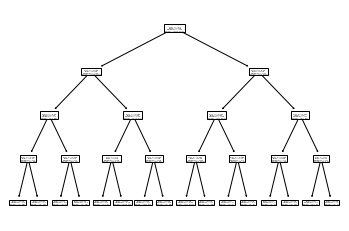

In [9]:
tree.plot_tree(DTmodel)

##Step7: Random Forest Model and reporting accuracy

In [10]:
RFmodel = RandomForestClassifier(n_estimators=300, 
                                 criterion='gini', 
                                 max_depth=None, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 max_features='sqrt', 
                                 random_state=None)
RFmodel.fit(X_Train,Y_Train)

predRF = RFmodel.predict(X_Test)
#print(predRF)

print(confusion_matrix(Y_Test, predRF))
print(classification_report(Y_Test,predRF))

[[62 14]
 [11 97]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        76
           1       0.87      0.90      0.89       108

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



##Step8: Logistic Regression and Reporting accuracy

In [11]:
LRmodel = LogisticRegression(penalty='l2',
                             C=1000,
                             random_state=None)
LRmodel.fit(X_Train,Y_Train)

predLR = LRmodel.predict(X_Test)
#print(predLR)

print(confusion_matrix(Y_Test, predLR))
print(classification_report(Y_Test,predLR))

[[60 16]
 [19 89]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        76
           1       0.85      0.82      0.84       108

    accuracy                           0.81       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.81      0.81       184



## DNN is coded in DNNkeras module